In [8]:
import json
import matplotlib.pyplot as plt
from collections import Counter

with open("results.json", "r", encoding="utf-8") as f:
    read_file = json.load(f)

def findValues(filters):
    plotData = []
    plotLabels = []

    for el in read_file:
        splitted = el["file"][:-5].split("-")
        uppercase_parts = [part for part in splitted if (part.isupper() and part != "GPT")]
        for fltr in filters:
            if uppercase_parts == fltr:
                plotData.append(el["f1score"])
                temp = el["file"][:-5]
                if len(fltr) == 0:
                    plotLabels.append(temp)
                else:
                    plotLabels.append(temp[:-len("".join(fltr))][:-len(fltr)])
    
    return plotLabels, plotData

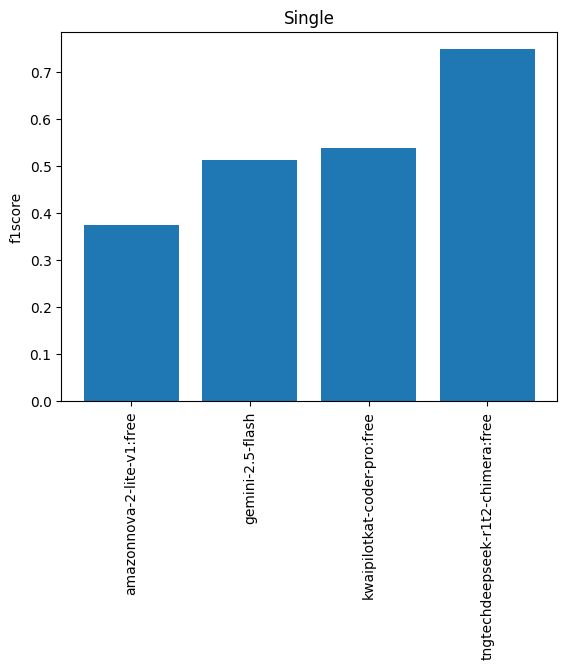

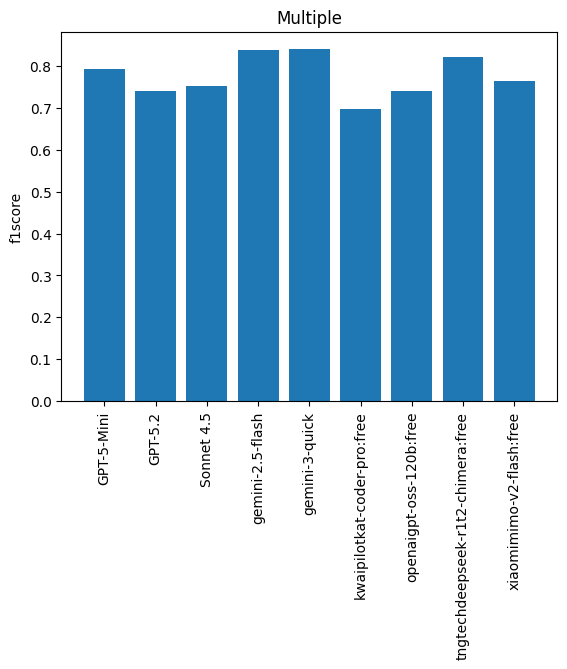

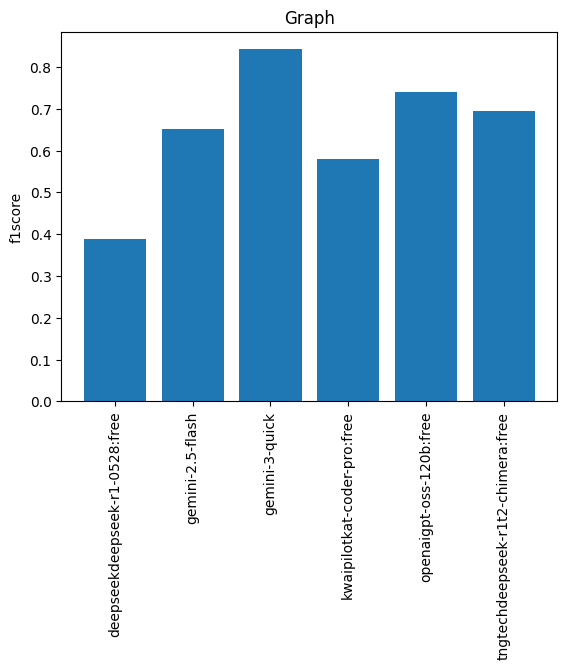

In [9]:
labels, data = findValues([[]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Single")
plt.xticks(rotation=90)
plt.show()

labels, data = findValues([["MANUAL"],["MULTIPLE"]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Multiple")
plt.xticks(rotation=90)
plt.show()

labels, data = findValues([["GRAPH"], ["GRAPH", "MULTIPLE"], ["MANUAL", "GRAPH"]])

plt.figure()
plt.bar(labels, data)
plt.ylabel("f1score")
plt.title("Graph")
plt.xticks(rotation=90)
plt.show()

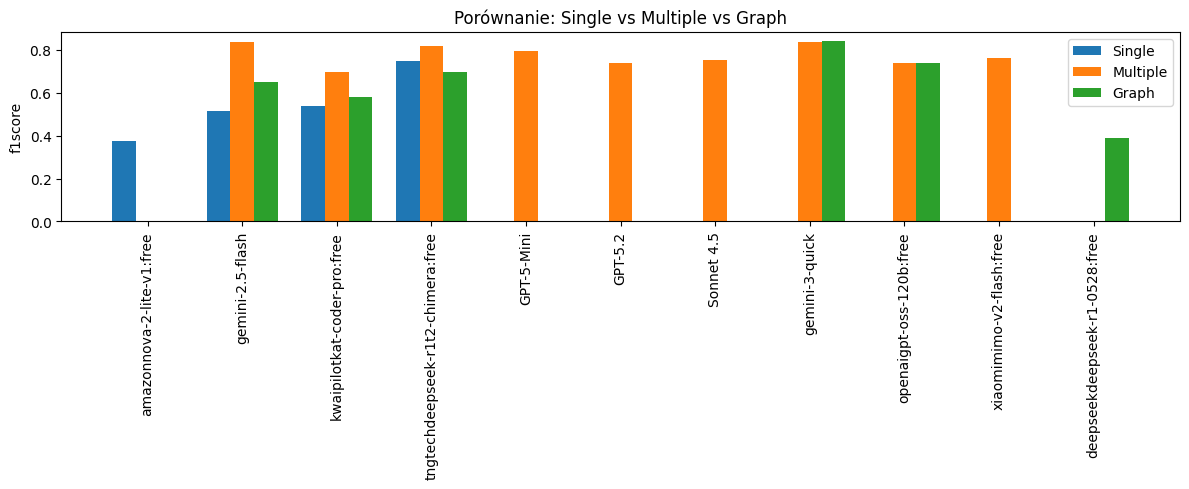

In [14]:
labels_single, data_single = findValues([[]])
labels_multiple, data_multiple = findValues([["MANUAL"], ["MULTIPLE"]])
labels_graph, data_graph = findValues([["GRAPH"], ["GRAPH", "MULTIPLE"], ["MANUAL", "GRAPH"]])

all_labels = list(dict.fromkeys(
    labels_single + labels_multiple + labels_graph
))

single_dict = dict(zip(labels_single, data_single))
multiple_dict = dict(zip(labels_multiple, data_multiple))
graph_dict = dict(zip(labels_graph, data_graph))

single_vals = [single_dict.get(l, 0) for l in all_labels]
multiple_vals = [multiple_dict.get(l, 0) for l in all_labels]
graph_vals = [graph_dict.get(l, 0) for l in all_labels]

x = list(range(len(all_labels)))
width = 0.25

plt.figure(figsize=(12, 5))

plt.bar([i - width for i in x], single_vals, width, label="Single")
plt.bar(x, multiple_vals, width, label="Multiple")
plt.bar([i + width for i in x], graph_vals, width, label="Graph")

plt.ylabel("f1score")
plt.title("Porównanie: Single vs Multiple vs Graph")
plt.xticks(x, all_labels, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
print("all models")
results = []
num = 0
for el in read_file:
    num += 1
    with open(f"results/{el["file"]}", "r", encoding="utf-8") as f:
        temp = json.load(f)
    for values in temp:
        if values["expected"] != values["received"]:
            results.append(values["id"])

counts = Counter(results)
for sample_id, freq in counts.items():
    if freq/num > 0.3:
        print(f"{sample_id} appeared in {freq/num*100:.0f}%")

print("good models")
results = []
num = 0
for el in read_file:
    if el["f1score"] > 0.7:
        num += 1
        with open(f"results/{el["file"]}", "r", encoding="utf-8") as f:
            temp = json.load(f)
        for values in temp:
            if values["expected"] != values["received"]:
                results.append(values["id"])

counts = Counter(results)
for sample_id, freq in counts.items():
    if freq/num > 0.3:
        print(f"{sample_id} appeared in {freq/num*100:.0f}%")


all models
2 appeared in 38%
534 appeared in 31%
18 appeared in 34%
419 appeared in 31%
48 appeared in 31%
59 appeared in 31%
88 appeared in 31%
643 appeared in 31%
589 appeared in 38%
good models
2 appeared in 53%
7 appeared in 33%
97 appeared in 40%
18 appeared in 40%
59 appeared in 33%
41 appeared in 33%
61 appeared in 33%
88 appeared in 40%
449 appeared in 33%


ID 2
Code:
void OverlayWindowViews::OnGestureEvent(ui::GestureEvent* event) {
  if (event->type() != ui::ET_GESTURE_TAP)
    return;

  hide_controls_timer_.Reset();

  if (!GetControlsScrimLayer()->visible()) {
    UpdateControlsVisibility(true);
    return;
  }

  if (GetCloseControlsBounds().Contains(event->location())) {
    controller_->Close(true /* should_pause_video */,
                       true /* should_reset_pip_player */);
    event->SetHandled();
  } else if (GetPlayPauseControlsBounds().Contains(event->location())) {
     TogglePlayPause();
     event->SetHandled();
   }
  views::Widget::OnGestureEvent(event); <- tutaj problem
 }

expected: Vulnerable

https://github.com/chromium/chromium/commit/fb83de09f2c986ee91741f3a2776feea0e18e3f6


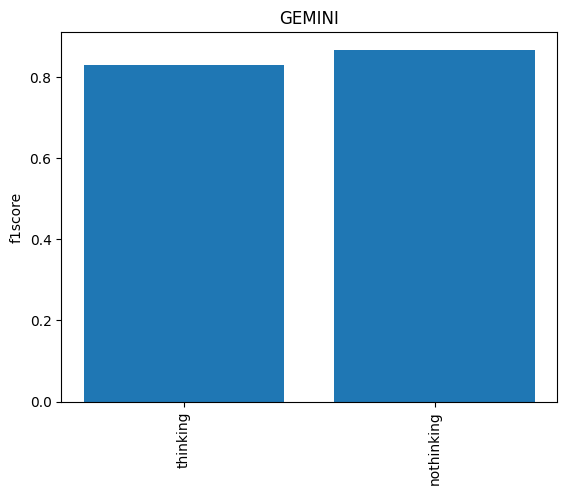

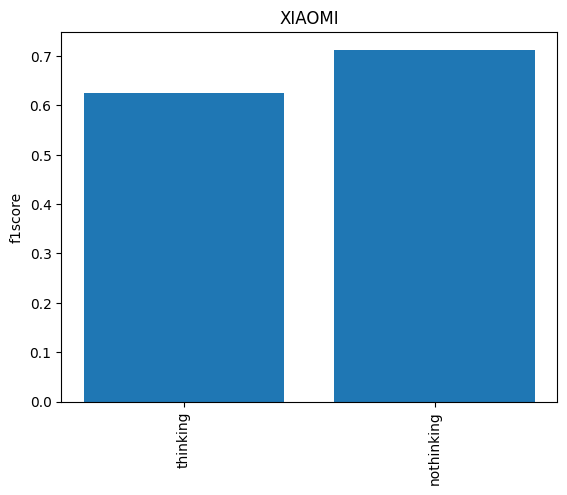

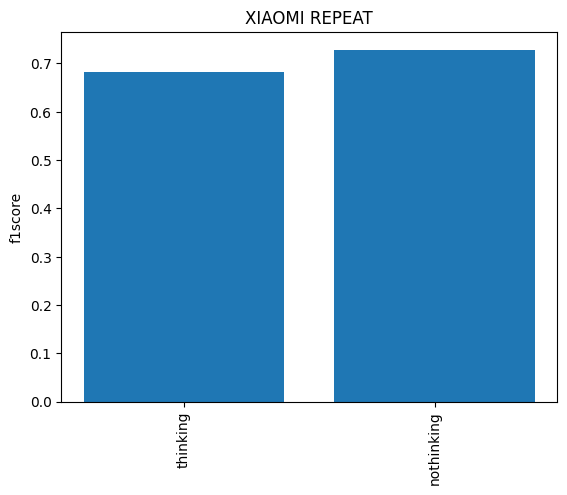

In [6]:
_, data = findValues([["THINKING","MULTIPLE"]])
_, data2 = findValues([["NOTHINKING","MULTIPLE"]])

plt.figure()
plt.bar(["thinking", "nothinking"], [data[0],data2[0]])
plt.ylabel("f1score")
plt.title("GEMINI")
plt.xticks(rotation=90)
plt.show()

_, data = findValues([["THINKING","GRAPH", "MULTIPLE"]])
_, data2 = findValues([["NOTHINKING","GRAPH", "MULTIPLE"]])

plt.figure()
plt.bar(["thinking", "nothinking"], [data[0],data2[0]])
plt.ylabel("f1score")
plt.title("XIAOMI")
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.bar(["thinking", "nothinking"], [data[1],data2[1]])
plt.ylabel("f1score")
plt.title("XIAOMI REPEAT")
plt.xticks(rotation=90)
plt.show()

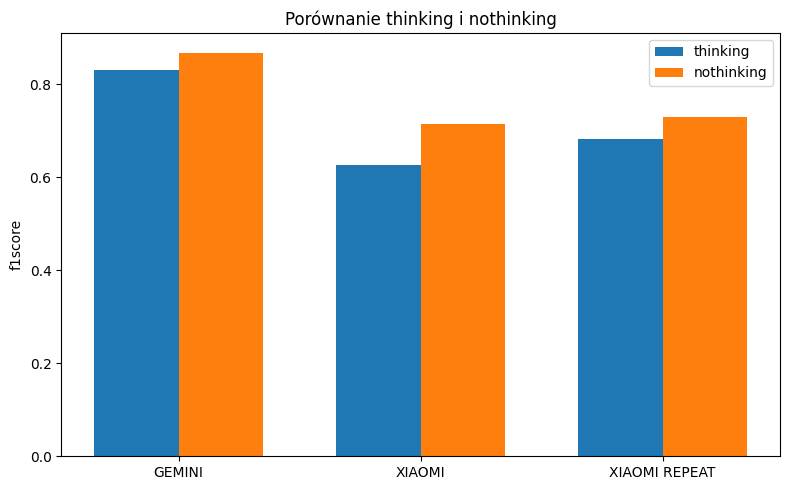

In [16]:
_, gem_th = findValues([["THINKING", "MULTIPLE"]])
_, gem_no = findValues([["NOTHINKING", "MULTIPLE"]])

_, x_th = findValues([["THINKING", "GRAPH", "MULTIPLE"]])
_, x_no = findValues([["NOTHINKING", "GRAPH", "MULTIPLE"]])

labels = ["GEMINI", "XIAOMI", "XIAOMI REPEAT"]

thinking_scores = [
    gem_th[0],   # GEMINI
    x_th[0],     # XIAOMI
    x_th[1]      # XIAOMI REPEAT
]

nothinking_scores = [
    gem_no[0],   # GEMINI
    x_no[0],     # XIAOMI
    x_no[1]      # XIAOMI REPEAT
]

x = [0, 1, 2]
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar([i - width/2 for i in x], thinking_scores, width, label="thinking")
plt.bar([i + width/2 for i in x], nothinking_scores, width, label="nothinking")

plt.ylabel("f1score")
plt.title("Porównanie thinking i nothinking")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
print("pdg vs cpg14")

cpg14 = -1.0;
pdg = -1.0

for el in read_file:
    if el["file"] == "gemini-3-quick-MANUAL-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "gemini-3-quick-MANUAL-GRAPH.json":
        pdg = el["f1score"]
print("gemini-3-quick")
print(f"{pdg} vs {cpg14}")

for el in read_file:
    if el["file"] == "kwaipilotkat-coder-pro:free-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "kwaipilotkat-coder-pro:free-GRAPH.json":
        pdg = el["f1score"]
print("kwaipilotkat")
print(f"{pdg} vs {cpg14}")

for el in read_file:
    if el["file"] == "tngtechdeepseek-r1t2-chimera:free-GRAPH-CPG14.json":
        cpg14 = el["f1score"]
    if el["file"] == "tngtechdeepseek-r1t2-chimera:free-GRAPH-MULTIPLE.json":
        pdg = el["f1score"]
print("tngtechdeepseek")
print(f"{pdg} vs {cpg14}")


pdg vs cpg14
gemini-3-quick
0.8421052631578948 vs 0.6865671641791045
kwaipilotkat
0.5807860262008734 vs 0.6405693950177935
tngtechdeepseek
0.6945812807881773 vs 0.6825775656324583
